In [32]:
import pandas as pd
import numpy as np

In [33]:
combine_data_2013 = pd.read_csv('../data/combine_data_2013.csv')
combine_data_2015 = pd.read_csv('../data/combine_data_2015.csv')
combine_data_2017 = pd.read_csv('../data/combine_data_2017.csv')
combine_data_2019 = pd.read_csv('../data/combine_data_2019.csv')

In [34]:
player_data_2013 = pd.read_csv('../data/player_data_2013.csv')
player_data_2015 = pd.read_csv('../data/player_data_2015.csv')
player_data_2017 = pd.read_csv('../data/player_data_2017.csv')
player_data_2019 = pd.read_csv('../data/player_data_2019.csv')

In [35]:
#Note that here we will start our data cleaning
# - we will focus on cleaning up the combine pandas dataframe to include players name and the six combine workout
# that each player is evaulated upon

# - we will also focus on cleaning up the player pandas dataframe to include the players name and the games played

In [36]:
combine_data_2013 = combine_data_2013[['Player', '40yd', 'Vertical','Bench', 'BroadJump', '3Cone', 'Shuttle']]
combine_data_2015= combine_data_2015[['Player', '40yd', 'Vertical','Bench', 'BroadJump', '3Cone', 'Shuttle']]
combine_data_2017= combine_data_2017[['Player', '40yd', 'Vertical','Bench', 'BroadJump', '3Cone', 'Shuttle']]
combine_data_2019= combine_data_2019[['Player', '40yd', 'Vertical','Bench', 'BroadJump', '3Cone', 'Shuttle']]
combine_data_2019

,Player,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle
0,Johnathan Abram,4.45,NaN,NaN,116.0,NaN,NaN
1,Paul Adams,5.18,27.0,16.0,103.0,7.68,4.74
2,Nasir Adderley,NaN,NaN,NaN,NaN,NaN,NaN
3,Azeez Al-Shaair,NaN,NaN,16.0,NaN,NaN,NaN
4,Otaro Alaka,4.82,36.0,20.0,131.0,NaN,NaN
...,...,...,...,...,...,...,...
331,Zedrick Woods,4.29,34.5,19.0,122.0,7.00,4.15
332,Evan Worthington,4.63,33.5,17.0,121.0,7.07,4.37
333,Renell Wren,5.01,32.0,30.0,118.0,7.65,4.53
334,Oshane Ximines,4.78,34.0,24.0,118.0,7.13,4.57


In [37]:
player_data_2013 = player_data_2013[['PlayerName','Games']]
player_data_2015 = player_data_2015[['PlayerName','Games']]
player_data_2017 = player_data_2017[['PlayerName','Games']]
player_data_2019 = player_data_2019[['PlayerName','Games']]
player_data_2019

,PlayerName,Games
0,Player,G
1,Christian McCaffrey*+,16
2,Ezekiel Elliott*,16
3,Nick Chubb*,16
4,Derrick Henry*,15
...,...,...
552,Jason Sanders,16
553,Darrius Shepherd,6
554,Eric Tomlinson,8
555,Vita Vea,16


In [38]:
#We will now drop any rows that have a NaN value. This is more specifically common in our NFL Combine data as 
#there are participants who only do certain exercises and not all due to position, injury, etc. However just to make 
#sure we will do the same for the player data as well.

In [39]:
#NOTE 
#We don't want to use a function like SimpleImputer from Scikit-Learn due to the fact that we don't want to assume what 
#another combine players stats could be just because they are the most frequent

In [40]:
combine_data_2013 = combine_data_2013.dropna()
combine_data_2015= combine_data_2015.dropna()
combine_data_2017= combine_data_2017.dropna()
combine_data_2019= combine_data_2019.dropna()
combine_data_2019

,Player,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle
1,Paul Adams,5.18,27.0,16.0,103.0,7.68,4.74
5,Dakota Allen,4.77,31.5,23.0,116.0,6.88,4.04
7,Zach Allen,5.00,32.0,24.0,112.0,7.34,4.36
9,Jeff Allison,4.82,31.0,12.0,115.0,7.20,4.45
10,Ugo Amadi,4.51,32.5,18.0,115.0,7.21,4.19
...,...,...,...,...,...,...,...
331,Zedrick Woods,4.29,34.5,19.0,122.0,7.00,4.15
332,Evan Worthington,4.63,33.5,17.0,121.0,7.07,4.37
333,Renell Wren,5.01,32.0,30.0,118.0,7.65,4.53
334,Oshane Ximines,4.78,34.0,24.0,118.0,7.13,4.57


In [41]:
player_data_2013 = player_data_2013.dropna()
player_data_2015 = player_data_2015.dropna()
player_data_2017 = player_data_2017.dropna()
player_data_2019 = player_data_2019.dropna()
player_data_2019

,PlayerName,Games
0,Player,G
1,Christian McCaffrey*+,16
2,Ezekiel Elliott*,16
3,Nick Chubb*,16
4,Derrick Henry*,15
...,...,...
552,Jason Sanders,16
553,Darrius Shepherd,6
554,Eric Tomlinson,8
555,Vita Vea,16


In [42]:
#We are now going to try and seperate our data into binary (1- played a snap 0-did not play a snap) in order to
#tell if a player that participated in the combine every played an NFL snap his rookie year

#But first we need to remove special characters from players names in the player data DF

In [43]:
player_data_2013['PlayerName'] = player_data_2013['PlayerName'].replace('[^a-zA-Z ]', '', regex=True)
player_data_2015['PlayerName'] = player_data_2015['PlayerName'].replace('[^a-zA-Z ]', '', regex=True)
player_data_2017['PlayerName'] = player_data_2017['PlayerName'].replace('[^a-zA-Z ]', '', regex=True)
player_data_2019['PlayerName'] = player_data_2019['PlayerName'].replace('[^a-zA-Z ]', '', regex=True)
player_data_2019

,PlayerName,Games
0,Player,G
1,Christian McCaffrey,16
2,Ezekiel Elliott,16
3,Nick Chubb,16
4,Derrick Henry,15
...,...,...
552,Jason Sanders,16
553,Darrius Shepherd,6
554,Eric Tomlinson,8
555,Vita Vea,16


In [44]:
played_game_2013 = pd.DataFrame(columns=['PlayerName', 'PlayedGame'])
played_game_2015 = pd.DataFrame(columns=['PlayerName', 'PlayedGame'])
played_game_2017 = pd.DataFrame(columns=['PlayerName', 'PlayedGame'])
played_game_2019 = pd.DataFrame(columns=['PlayerName', 'PlayedGame'])



#2013
#get players from combine who played a snap
for name_player in player_data_2013['PlayerName']:
    for name_combine in combine_data_2013['Player']:
        if name_player == name_combine:
            games_value = int(player_data_2013.loc[player_data_2013['PlayerName'] == name_player, 'Games'].iloc[0])
            played_game_2013 = pd.concat([played_game_2013, pd.DataFrame({'PlayerName': [name_combine], 'PlayedGame': [1]})], ignore_index=True)
            
    
#takes players from combine who are not in the played_game df (meaning they never played a game) and assigns 
#them a binary value of 0, false, as in they never played a game
for name_combine in combine_data_2013['Player']:
    if(name_combine not in played_game_2013['PlayerName']):
        played_game_2013 = pd.concat([played_game_2013, pd.DataFrame({'PlayerName': [name_combine], 'PlayedGame': [0]})], ignore_index=True)

        
#2015
#get players from combine who played a snap
for name_player in player_data_2015['PlayerName']:
    for name_combine in combine_data_2015['Player']:
        if name_player == name_combine:
            games_value = int(player_data_2015.loc[player_data_2015['PlayerName'] == name_player, 'Games'].iloc[0])
            played_game_2015 = pd.concat([played_game_2015, pd.DataFrame({'PlayerName': [name_combine], 'PlayedGame': [1]})], ignore_index=True)
            
    
#takes players from combine who are not in the played_game df (meaning they never played a game) and assigns 
#them a binary value of 0, false, as in they never played a game
for name_combine in combine_data_2015['Player']:
    if(name_combine not in played_game_2015['PlayerName']):
        played_game_2015 = pd.concat([played_game_2015, pd.DataFrame({'PlayerName': [name_combine], 'PlayedGame': [0]})], ignore_index=True)

        

#2017
#get players from combine who played a snap
for name_player in player_data_2017['PlayerName']:
    for name_combine in combine_data_2017['Player']:
        if name_player == name_combine:
            games_value = int(player_data_2017.loc[player_data_2017['PlayerName'] == name_player, 'Games'].iloc[0])
            played_game_2017 = pd.concat([played_game_2017, pd.DataFrame({'PlayerName': [name_combine], 'PlayedGame': [1]})], ignore_index=True)
            
    
#takes players from combine who are not in the played_game df (meaning they never played a game) and assigns 
#them a binary value of 0, false, as in they never played a game
for name_combine in combine_data_2017['Player']:
    if(name_combine not in played_game_2017['PlayerName']):
        played_game_2017 = pd.concat([played_game_2017, pd.DataFrame({'PlayerName': [name_combine], 'PlayedGame': [0]})], ignore_index=True)
        


#2019
#get players from combine who played a snap
for name_player in player_data_2019['PlayerName']:
    for name_combine in combine_data_2019['Player']:
        if name_player == name_combine:
            games_value = int(player_data_2019.loc[player_data_2019['PlayerName'] == name_player, 'Games'].iloc[0])
            played_game_2019 = pd.concat([played_game_2019, pd.DataFrame({'PlayerName': [name_combine], 'PlayedGame': [1]})], ignore_index=True)
            
    
#takes players from combine who are not in the played_game df (meaning they never played a game) and assigns 
#them a binary value of 0, false, as in they never played a game
for name_combine in combine_data_2019['Player']:
    if(name_combine not in played_game_2019['PlayerName']):
        played_game_2019 = pd.concat([played_game_2019, pd.DataFrame({'PlayerName': [name_combine], 'PlayedGame': [0]})], ignore_index=True)
        
                
                
played_game_2015
            

,PlayerName,PlayedGame
0,David Johnson,1
1,Javorius Allen,1
2,Melvin Gordon,1
3,Ameer Abdullah,1
4,Karlos Williams,1
...,...,...
183,Trey Williams,0
184,Damien Wilson,0
185,Gabe Wright,0
186,T.J. Yeldon,0


In [45]:
#now we will combine the PlayedGame column with our in our played_game_xxxx dataframe with our 
#combine_data_xxxx dataframe based on the Players Name

In [46]:
merged_player_data_2013 = pd.merge(combine_data_2013, played_game_2013, left_on='Player', right_on='PlayerName')
merged_player_data_2013 = merged_player_data_2013.drop(columns=['PlayerName'])

merged_player_data_2017 = pd.merge(combine_data_2017, played_game_2017, left_on='Player', right_on='PlayerName')
merged_player_data_2017 = merged_player_data_2017.drop(columns=['PlayerName'])

merged_player_data_2019 = pd.merge(combine_data_2019, played_game_2019, left_on='Player', right_on='PlayerName')
merged_player_data_2019 = merged_player_data_2019.drop(columns=['PlayerName'])

merged_player_data = pd.concat([merged_player_data_2013, merged_player_data_2017, merged_player_data_2019], axis=0, ignore_index=True)
merged_player_data

,Player,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle,PlayedGame
0,Oday Aboushi,5.41,23.5,17.0,100.0,7.92,4.84,0
1,Robert Alford,4.39,40.0,17.0,132.0,6.89,4.23,0
2,C.J. Anderson,4.60,32.0,17.0,119.0,7.15,4.12,0
3,Ziggy Ansah,4.56,34.5,21.0,118.0,7.11,4.26,0
4,Marc Anthony,4.63,35.0,12.0,118.0,6.74,4.07,0
...,...,...,...,...,...,...,...,...
541,Zedrick Woods,4.29,34.5,19.0,122.0,7.00,4.15,0
542,Evan Worthington,4.63,33.5,17.0,121.0,7.07,4.37,0
543,Renell Wren,5.01,32.0,30.0,118.0,7.65,4.53,0
544,Oshane Ximines,4.78,34.0,24.0,118.0,7.13,4.57,0


In [47]:
T = merged_player_data['PlayedGame']
X = merged_player_data.loc[:, (merged_player_data.columns != "PlayedGame") & (merged_player_data.columns != "Player")]
X

,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle
0,5.41,23.5,17.0,100.0,7.92,4.84
1,4.39,40.0,17.0,132.0,6.89,4.23
2,4.60,32.0,17.0,119.0,7.15,4.12
3,4.56,34.5,21.0,118.0,7.11,4.26
4,4.63,35.0,12.0,118.0,6.74,4.07
...,...,...,...,...,...,...
541,4.29,34.5,19.0,122.0,7.00,4.15
542,4.63,33.5,17.0,121.0,7.07,4.37
543,5.01,32.0,30.0,118.0,7.65,4.53
544,4.78,34.0,24.0,118.0,7.13,4.57


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, T, test_size = .20, random_state = 0)


print(X.shape, X_train.shape, X_test.shape, t_train.shape, t_test.shape)

(546, 6) (436, 6) (110, 6) (436,) (110,)


In [49]:
#Calculate R^2 Value
from sklearn.linear_model import LinearRegression

np.random.seed(0)

# 1) initialize
model = LinearRegression()

# 2) train the model
model.fit(X_train, t_train)

# 3) evaluate
test_score = model.score(X_test,t_test)

print("Test score: ", test_score)

Test score:  0.05943625410630615


In [50]:
#Using a simple Linear Regression model it appears that our R^2 value 
#is not very promising as we scored worse than a simple meaning model
#(score<0)

#Note that a score of 1 would be perfect

#lets see what this looks like when plotted

(110,)


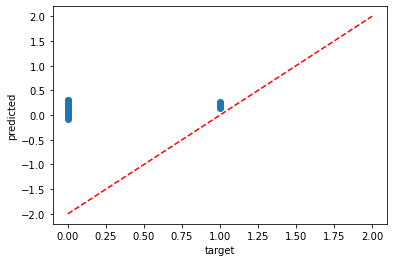

In [51]:
import matplotlib.pyplot as plt 

y=model.predict(X_test)

plt.scatter(t_test, y)



# dashed diagonal line
plt.plot([0,2], [-2,2], 'r--')
# x and y labels
plt.xlabel("target")
plt.ylabel("predicted")

print(y.shape)

In [52]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(t_test, predictions))

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.3505640416443817


In [53]:
#this model also does not seem to measure Root Mean Squared Error very
#well either as it is being tested against binary values 
#1 - played a game or 0 - did not play a game. Therefore for this
#to be a fairly accurate model it needs to be much closer to 0.

In [54]:
#Lets try taking a different approach. 

In [55]:
#Now we will try the five models proposed in the paper our research is based off of "NFL Career Success as Predicted by NFL Scouting Combine"
#These models will be as follows
#Support Vector Machine
#Gradient Boosting
#Random Forest Decision Tree
#Multivariate Linear Regression
#Decision Tree

Support Vector Machine (come back to getting weird error)

In [95]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

T = T.astype('int')
X_train, X_test, t_train, t_test = train_test_split(X, T, test_size=0.20, random_state=0)

#create Support Vector Machine classifier
svm_classifier = SVC()

#training our current classifier
svm_classifier.fit(X_train, t_train)

#making predictions on the test set
model_predictions = svm_classifier.predict(X_test)

#calculate predicted labels vs. corrected labels
accuracy = accuracy_score(t_test, model_predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8454545454545455


Gradient Boosting

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

T = T.astype('int')
X_train, X_test, t_train, t_test = train_test_split(X, T, test_size=0.20, random_state=0)

#create gradient boosting classifier
gb_classifier = GradientBoostingClassifier(learning_rate=.8, max_depth=1, random_state=2)

#training our current classifier
gb_classifier.fit(X_train, t_train)

#making predictions on the test set
model_predictions = gb_classifier.predict(X_test)

#calculate predicted labels vs. corrected labels
accuracy = accuracy_score(t_test, model_predictions)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8272727272727273


Random Forest Decision Tree

In [97]:
from sklearn.ensemble import RandomForestClassifier

T = T.astype('int')
X_train, X_test, t_train, t_test = train_test_split(X, T, test_size=0.20, random_state=0)

#create random forest decision tree classifier
rf_classifier = RandomForestClassifier()

#training our current classifier
rf_classifier.fit(X_train, t_train)

#making predictions on the test set
model_predictions = rf_classifier.predict(X_test)

#calculate predicted labels vs. corrected labels
accuracy = accuracy_score(t_test, model_predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7181818181818181


Multivariate Linear Regression

In [98]:
from sklearn.linear_model import LinearRegression

np.random.seed(0)
T = T.astype('int')
X_train, X_test, t_train, t_test = train_test_split(X, T, test_size=0.20, random_state=0)
# 1) initialize
model = LinearRegression()

# 2) train the model
model.fit(X_train, t_train)

# 3) evaluate
test_score = model.score(X_test,t_test)

print("Test score: ", test_score)

Test score:  0.05943625410630615


Decision Tree

In [99]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, t_train, t_test = train_test_split(X, T, test_size=0.2, random_state=0)

tree_regressor = DecisionTreeRegressor(random_state=0)

tree_regressor.fit(X_train, t_train)

t_pred = tree_regressor.predict(X_test)

mse = mean_squared_error(t_test, t_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.3090909090909091


Models not included in paper but want to consider to due high rate of probability classification with binary target values from personal research

Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression
T = T.astype('int')
X_train, X_test, t_train, t_test = train_test_split(X, T, test_size=0.20, random_state=0)

#create logistic regression classifier
lr = LogisticRegression()

#training our current classifier
lr.fit(X_train, t_train)

#making predictions on the test set
model_predictions = lr.predict(X_test)

#calculate predicted labels vs. corrected labels
accuracy = accuracy_score(t_test, model_predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8454545454545455


k-Nearest Neighbors

In [102]:
from sklearn.neighbors import KNeighborsClassifier
T = T.astype('int')
X_train, X_test, t_train, t_test = train_test_split(X, T, test_size=0.20, random_state=0)

#create K-Nearest Neighbor classifier
knn = KNeighborsClassifier()

#training our current classifier
knn.fit(X_train, t_train)

#making predictions on the test set
model_predictions = knn.predict(X_test)

#calculate predicted labels vs. corrected labels
accuracy = accuracy_score(t_test, model_predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8363636363636363


Naive Bayesian

In [103]:
from sklearn.naive_bayes import GaussianNB
T = T.astype('int')
X_train, X_test, t_train, t_test = train_test_split(X, T, test_size=0.20, random_state=0)

#create Naive Bayesian classifier
bayes = GaussianNB()

#training our current classifier
bayes.fit(X_train, t_train)

#making predictions on the test set
model_predictions = bayes.predict(X_test)

#calculate predicted labels vs. corrected labels
accuracy = accuracy_score(t_test, model_predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5454545454545454
